In [23]:
%reload_ext autoreload
%autoreload 2
from PCN import PCN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plyer import notification
from helpers import get_iris_data

In [24]:
epochs = 10
sample_interval = np.ceil(epochs/10).astype(int)

In [25]:
# Load data from iris and create training and test sets
X_train, X_test, y_train, y_test = get_iris_data()

In [26]:
# Setting up ten agents of PCN
agents = [PCN(4, [6], 3, learning_rate=0.1, max_iter=200) for _ in range(100)]

In [27]:
# Training the agents
print('Training the agents...')
# agent_predictions = []
agent_accuracies = []
agent_errors = []
for agent in agents:
    print('Training agent', agents.index(agent))
    # predictions = []
    accuracies = []
    errors = []
    for i in range(epochs):
        if not i % sample_interval:
            _, acc, error = agent.test(X_test, y_test)
            # predictions.append(pred)
            accuracies.append(acc)
            errors.append(np.mean(error))
        agent.train(X_train, y_train)
    # agent_predictions.append(predictions)
    agent_accuracies.append(accuracies)
    agent_errors.append(errors)

Training the agents...
Training agent 0
Training agent 1
Training agent 2
Training agent 3
Training agent 4
Training agent 5
Training agent 6
Training agent 7
Training agent 8
Training agent 9
Training agent 10
Training agent 11
Training agent 12
Training agent 13
Training agent 14
Training agent 15
Training agent 16
Training agent 17
Training agent 18
Training agent 19
Training agent 20
Training agent 21
Training agent 22
Training agent 23
Training agent 24
Training agent 25
Training agent 26
Training agent 27
Training agent 28
Training agent 29
Training agent 30
Training agent 31
Training agent 32
Training agent 33
Training agent 34
Training agent 35
Training agent 36
Training agent 37
Training agent 38
Training agent 39
Training agent 40
Training agent 41
Training agent 42
Training agent 43
Training agent 44
Training agent 45
Training agent 46
Training agent 47
Training agent 48
Training agent 49
Training agent 50
Training agent 51
Training agent 52
Training agent 53
Training agent 

In [28]:
# Testing agents against test set
print('Testing agents...')
agent_accuracy = []
for agent in agents:
    _, accuracy, _ = agent.test(X_test, y_test)
    agent_accuracy.append(accuracy)

print(f'Average accuracy of agents: {np.mean(agent_accuracy):.3f}')

Testing agents...
Average accuracy of agents: 0.797


In [29]:
# Testing agents against training set
print('Testing agents...')
agent_accuracy = []
for agent in agents:
    _, accuracy, _ = agent.test(X_train, y_train)
    agent_accuracy.append(accuracy)

print(f'Average accuracy of agents: {np.mean(agent_accuracy):.3f}')

Testing agents...
Average accuracy of agents: 0.881


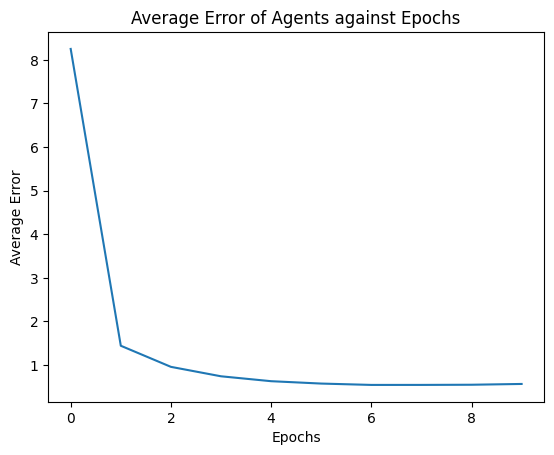

In [30]:
# Calculating the average error of the agents and plotting against epochs
avg_errors = np.mean(agent_errors, axis=0)
plt.plot(range(0, epochs, sample_interval), avg_errors)
plt.title('Average Error of Agents against Epochs')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.show()

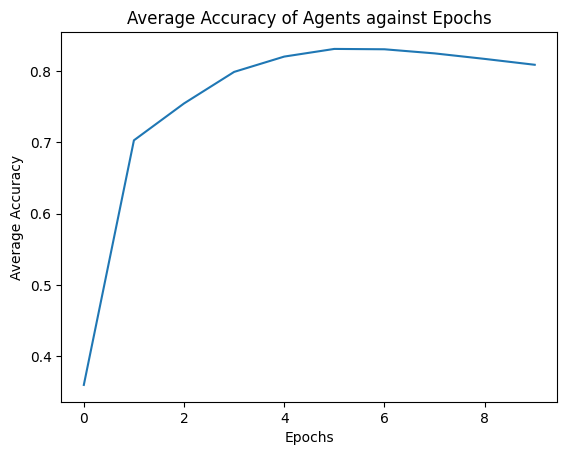

Average accuracy of agents: 0.809


In [31]:
# Calculating the average accuracy of the agents and plotting against epochs
avg_accuracies = np.mean(agent_accuracies, axis=0)
plt.plot(range(0, epochs, sample_interval), avg_accuracies)
plt.title('Average Accuracy of Agents against Epochs')
plt.xlabel('Epochs')
plt.ylabel('Average Accuracy')
plt.show()
print(f'Average accuracy of agents: {avg_accuracies[-1]:.3f}')

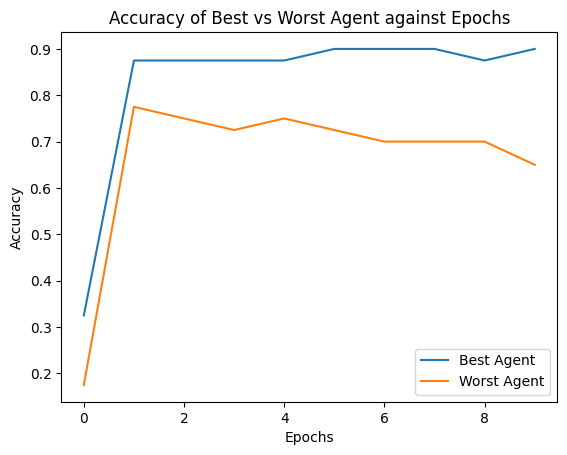

In [32]:
# Plotting performance of the best agent against epochs
best_agent = np.argmax(np.array(agent_accuracies)[:, -1])
worst_agent = np.argmin(np.array(agent_accuracies)[:, -1])
plt.plot(range(0, epochs, sample_interval), agent_accuracies[best_agent])
plt.plot(range(0, epochs, sample_interval), agent_accuracies[worst_agent])
plt.legend(['Best Agent', 'Worst Agent'])
plt.title('Accuracy of Best vs Worst Agent against Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
